# Image Preprocessing
This notebook imports images from the 'images' folder and preprocesses them by:
- Resizing to a target size
- Sharpening the images

In [1]:
import os
import cv2
import numpy as np
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
images_folder = 'images'
output_folder = 'processed_images'

os.makedirs(output_folder, exist_ok=True)

LARGE_IMAGE_TARGET = (2000, 2667)

SMALL_IMAGE_TARGET = (900, 1200)

SIZE_THRESHOLD = 2000  # pixels

In [3]:
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.webp']
image_files = []

if os.path.exists(images_folder):
    for file in os.listdir(images_folder):
        if any(file.lower().endswith(ext) for ext in image_extensions):
            image_files.append(os.path.join(images_folder, file))
    print(f"Found {len(image_files)} images in '{images_folder}' folder")
else:
    print(f"Warning: '{images_folder}' folder not found!")

for img_path in image_files:
    print(f"  - {os.path.basename(img_path)}")

Found 51 images in 'images' folder
  - c01627aa-c264-4992-8dbe-cd5124ac2d91.JPG
  - 060a9d02-f5e7-4f14-bb33-3775a71fa2ca.JPG
  - aada37df-b83f-48a0-917f-009e79816b58.JPG
  - a60d7a62-318a-4e83-9edb-dd71d1934c2e.JPG
  - 1bea58de-6df3-4346-b62e-ff21a577f487.JPG
  - ec2b4478-0668-4149-962b-d79c0c0a6adb.JPG
  - caeb20a0-f240-45a6-b511-371f5afce496.JPG
  - f98af0e3-1c47-4024-a719-52c0d1c8d1aa.JPG
  - 84ca851b-4730-4b7b-92d3-b67b56a1df87.JPG
  - 9c190893-1e22-41dd-a621-02baa02de07d.JPG
  - f8533b58-35bd-4970-95a3-6371e8914432.JPG
  - 16ccc8bf-d213-491e-9265-b78c422b0ffe.JPG
  - 3222c1e5-55e4-49bd-9ab0-ee262e9bf626.JPG
  - c1e07f95-a6b7-46eb-8d4a-2336732b9626.JPG
  - 0d2dbf8d-3470-4555-9f79-b0a4bbcceafa.JPG
  - 6d079c38-5169-46d7-af41-c6bb8cae17ee.JPG
  - b36475e3-7275-4b4b-8f1c-2477a3f87d92.JPG
  - 15126c0d-e33d-4c90-9a8d-2e8fa4dec877.JPG
  - 11cd22e4-85a0-40d9-87df-ef17bf2fd6e0.JPG
  - ee4303f1-adab-436c-929f-904aeed7c852.JPG
  - c85608b2-ad39-4867-b015-76ac27c643d0.JPG
  - 9f45477f-0865-46

In [4]:
def preprocess_image(image_path, sharpen_strength=2.0):
    img = Image.open(image_path)
    
    try:
        from PIL import ImageOps
        img = ImageOps.exif_transpose(img)
    except Exception:
        pass
    
    if img.mode != 'RGB':
        img = img.convert('RGB')
    
    original_width, original_height = img.size
    
    if original_width > SIZE_THRESHOLD or original_height > SIZE_THRESHOLD:
        target_size = LARGE_IMAGE_TARGET
    else:
        target_size = SMALL_IMAGE_TARGET
    
    target_width, target_height = target_size
    
    original_ratio = original_width / original_height
    target_ratio = target_width / target_height
    
    if original_ratio > target_ratio:
        new_width = target_width
        new_height = int(target_width / original_ratio)
    else:
        new_height = target_height
        new_width = int(target_height * original_ratio)
    
    img_resized = img.resize((new_width, new_height), Image.Resampling.LANCZOS)
    
    img_sharpened = img_resized.filter(
        ImageFilter.UnsharpMask(radius=2, percent=int(sharpen_strength * 100), threshold=3)
    )
    
    print(f"  Original size: {original_width}×{original_height} → Resized to: {new_width}×{new_height}")
    
    return img_sharpened

In [5]:
processed_images = []

for img_path in image_files:
    try:
        processed_img = preprocess_image(img_path)
        
        output_path = os.path.join(output_folder, os.path.basename(img_path))
        processed_img.save(output_path, quality=95)
        
        processed_images.append((img_path, processed_img))
        
        print(f"Processed: {os.path.basename(img_path)}")
        
    except Exception as e:
        print(f"Error processing {os.path.basename(img_path)}: {str(e)}")

print(f"Successfully processed {len(processed_images)} out of {len(image_files)} images")
print(f"Output saved to '{output_folder}' folder")

  Original size: 3120×4160 → Resized to: 2000×2666
Processed: c01627aa-c264-4992-8dbe-cd5124ac2d91.JPG
  Original size: 3120×4160 → Resized to: 2000×2666
Processed: 060a9d02-f5e7-4f14-bb33-3775a71fa2ca.JPG
  Original size: 960×1280 → Resized to: 900×1200
Processed: aada37df-b83f-48a0-917f-009e79816b58.JPG
  Original size: 3120×4160 → Resized to: 2000×2666
Processed: a60d7a62-318a-4e83-9edb-dd71d1934c2e.JPG
  Original size: 3120×4160 → Resized to: 2000×2666
Processed: 1bea58de-6df3-4346-b62e-ff21a577f487.JPG
  Original size: 3120×4160 → Resized to: 2000×2666
Processed: ec2b4478-0668-4149-962b-d79c0c0a6adb.JPG
  Original size: 3120×4160 → Resized to: 2000×2666
Processed: caeb20a0-f240-45a6-b511-371f5afce496.JPG
  Original size: 3120×4160 → Resized to: 2000×2666
Processed: f98af0e3-1c47-4024-a719-52c0d1c8d1aa.JPG
  Original size: 3120×4160 → Resized to: 2000×2666
Processed: 84ca851b-4730-4b7b-92d3-b67b56a1df87.JPG
  Original size: 3120×4160 → Resized to: 2000×2666
Processed: 9c190893-1e22

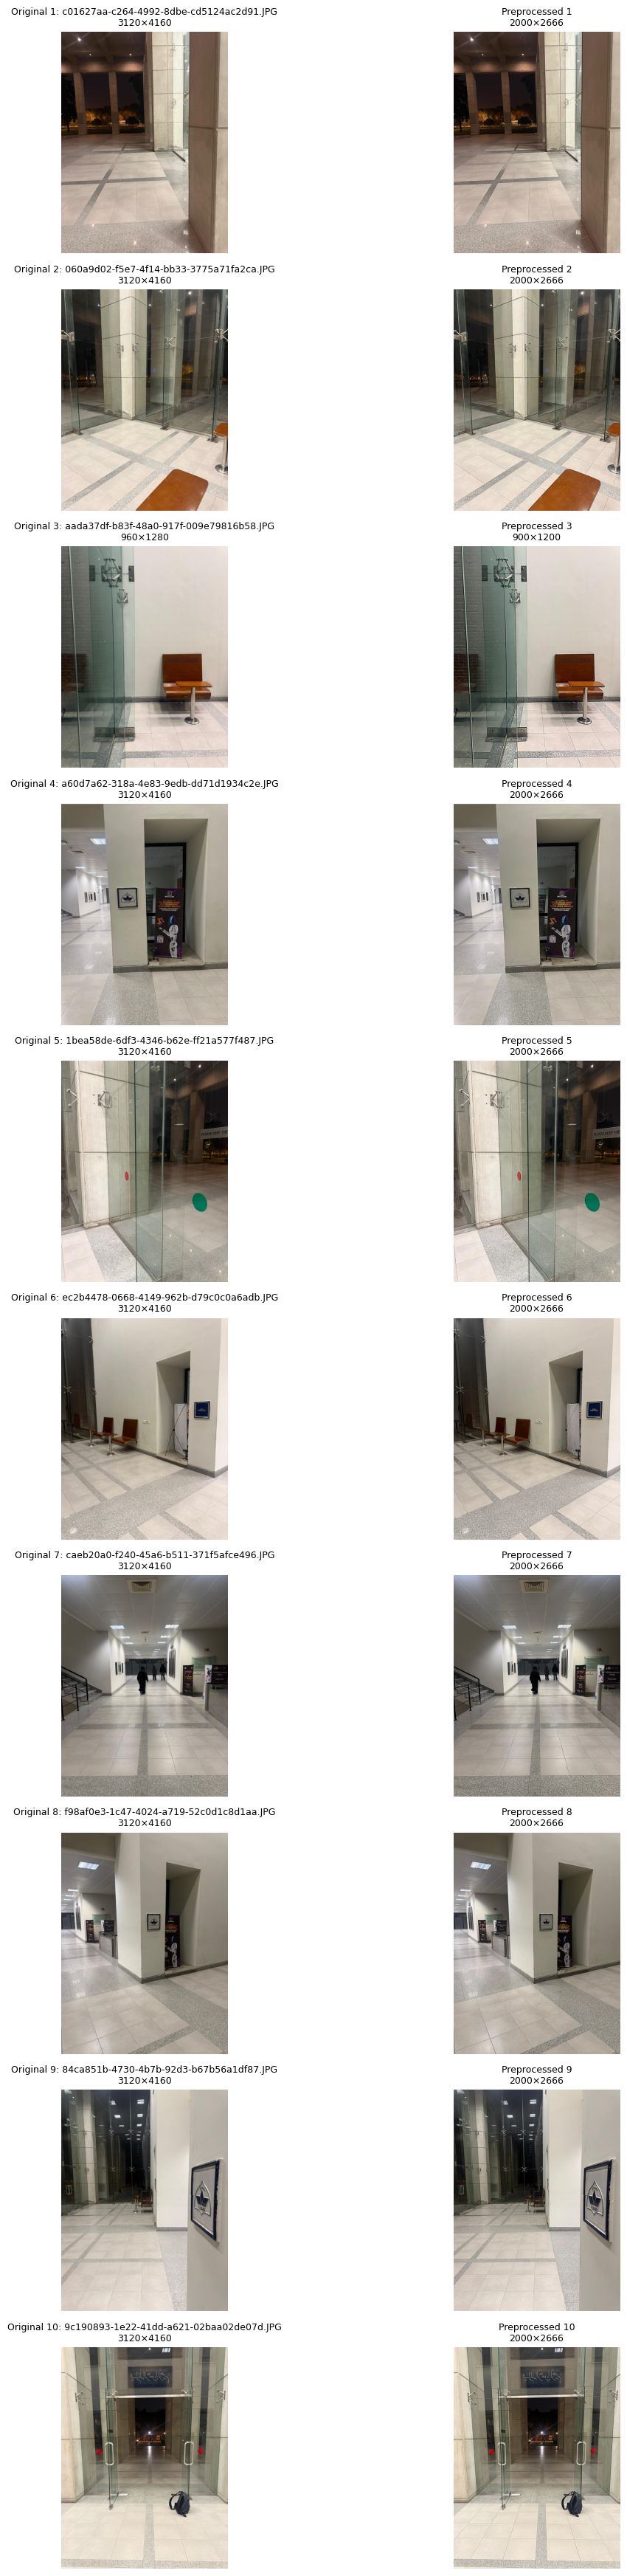

In [109]:
if processed_images:
    num_examples = min(10, len(processed_images))
    
    num_rows = num_examples
    num_cols = 2
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 3.5 * num_rows))
    
    if num_examples == 1:
        axes = axes.reshape(1, -1)
    
    for idx in range(num_examples):
        img_path, processed_img = processed_images[idx]
        
        original_img = Image.open(img_path)
        try:
            from PIL import ImageOps
            original_img = ImageOps.exif_transpose(original_img)
        except Exception:
            pass
        
        if original_img.mode != 'RGB':
            original_img = original_img.convert('RGB')
        axes[idx, 0].imshow(original_img)
        axes[idx, 0].set_title(f'Original {idx+1}: {os.path.basename(img_path)}\n{original_img.size[0]}×{original_img.size[1]}', fontsize=9)
        axes[idx, 0].axis('off')
        
        axes[idx, 1].imshow(processed_img)
        axes[idx, 1].set_title(f'Preprocessed {idx+1}\n{processed_img.size[0]}×{processed_img.size[1]}', fontsize=9)
        axes[idx, 1].axis('off')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("No images to display")

In [6]:
def detect_and_match_features(img1_path, img2_path, method='sift'):
    img1 = cv2.imread(img1_path)
    img2 = cv2.imread(img2_path)
    
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    
    if method.lower() == 'sift':
        try:
            detector = cv2.SIFT_create()
        except:
            print("SIFT not available, using ORB instead")
            detector = cv2.ORB_create(nfeatures=2000)
            method = 'orb'
    else:
        detector = cv2.ORB_create(nfeatures=2000)
    
    kp1, des1 = detector.detectAndCompute(gray1, None)
    kp2, des2 = detector.detectAndCompute(gray2, None)
    
    if method.lower() == 'sift':
        FLANN_INDEX_KDTREE = 1
        index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
        search_params = dict(checks=50)
        matcher = cv2.FlannBasedMatcher(index_params, search_params)
        matches = matcher.knnMatch(des1, des2, k=2)
        
        good_matches = []
        for match_pair in matches:
            if len(match_pair) == 2:
                m, n = match_pair
                if m.distance < 0.7 * n.distance:
                    good_matches.append(m)
    else:
        matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
        matches = matcher.match(des1, des2)
        good_matches = sorted(matches, key=lambda x: x.distance)[:100]
    
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None,
                                   flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    
    img_matches_rgb = cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB)
    
    return img_matches_rgb, len(good_matches), len(kp1), len(kp2)


Matching: c01627aa-c264-4992-8dbe-cd5124ac2d91.JPG <-> 060a9d02-f5e7-4f14-bb33-3775a71fa2ca.JPG

Matching: c01627aa-c264-4992-8dbe-cd5124ac2d91.JPG <-> aada37df-b83f-48a0-917f-009e79816b58.JPG

Matching: c01627aa-c264-4992-8dbe-cd5124ac2d91.JPG <-> aada37df-b83f-48a0-917f-009e79816b58.JPG

Matching: c01627aa-c264-4992-8dbe-cd5124ac2d91.JPG <-> a60d7a62-318a-4e83-9edb-dd71d1934c2e.JPG

Matching: c01627aa-c264-4992-8dbe-cd5124ac2d91.JPG <-> a60d7a62-318a-4e83-9edb-dd71d1934c2e.JPG

Matching: c01627aa-c264-4992-8dbe-cd5124ac2d91.JPG <-> 1bea58de-6df3-4346-b62e-ff21a577f487.JPG

Matching: c01627aa-c264-4992-8dbe-cd5124ac2d91.JPG <-> 1bea58de-6df3-4346-b62e-ff21a577f487.JPG


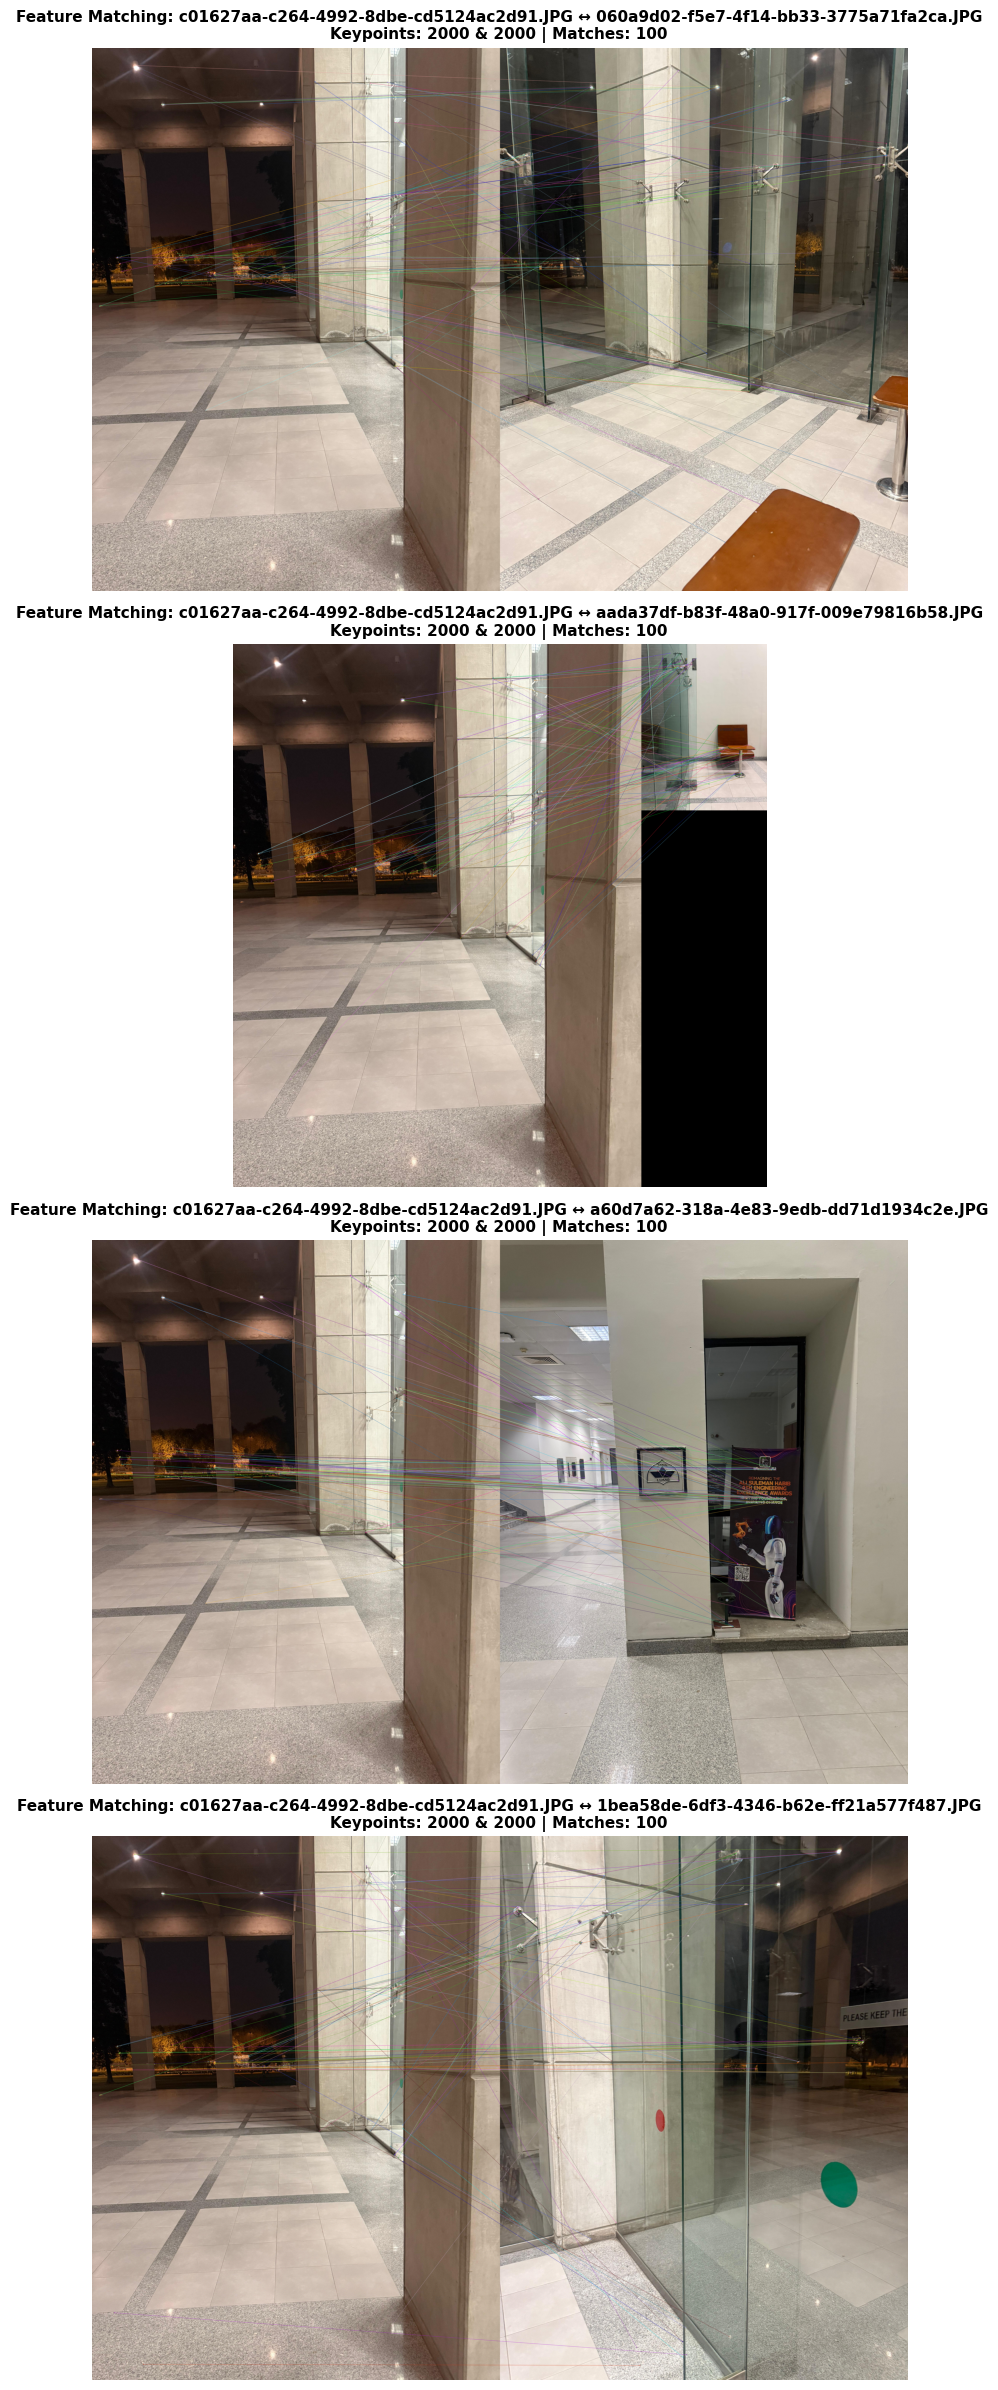

In [111]:
if len(processed_images) >= 2:
    num_comparisons = min(4, len(processed_images) - 1)
    
    reference_img_path = processed_images[0][0]
    reference_name = os.path.basename(reference_img_path)
    
    fig, axes = plt.subplots(num_comparisons, 1, figsize=(16, 6 * num_comparisons))
    
    if num_comparisons == 1:
        axes = [axes]
    
    for i in range(num_comparisons):
        compare_img_path = processed_images[i + 1][0]
        compare_name = os.path.basename(compare_img_path)
        
        print(f"\nMatching: {reference_name} <-> {compare_name}")
        
        matched_img, num_matches, kp1_count, kp2_count = detect_and_match_features(
            reference_img_path, compare_img_path, method='orb'
        )
        
        
        axes[i].imshow(matched_img)
        axes[i].set_title(f'Feature Matching: {reference_name} ↔ {compare_name}\n'
                         f'Keypoints: {kp1_count} & {kp2_count} | Matches: {num_matches}',
                         fontsize=11, fontweight='bold')
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()
        
else:
    print("Need at least 2 images for feature matching")

In [7]:
def save_point_cloud_ply(points_3d, filename="point_cloud.ply"):
    """
    Save 3D point cloud to PLY file format for viewing.
    """
    header = f"""ply
format ascii 1.0
element vertex {len(points_3d)}
property float x
property float y
property float z
property uchar red
property uchar green
property uchar blue
end_header
"""
    
    # Generate colors (can be enhanced with actual image colors later)
    colors = np.random.randint(0, 255, size=(len(points_3d), 3))
    
    with open(filename, 'w') as f:
        f.write(header)
        for i, point in enumerate(points_3d):
            f.write(f"{point[0]:.6f} {point[1]:.6f} {point[2]:.6f} ")
            f.write(f"{colors[i, 0]} {colors[i, 1]} {colors[i, 2]}\n")
    
    print(f"Point cloud saved to: {filename}")
    print(f"You can view this file in MeshLab, CloudCompare, or other 3D viewers")
    
    return filename

# Structure from Motion (SfM) - Two-View Reconstruction

This section implements a complete two-view SfM pipeline that:
1. Takes two images with parallax (camera moved between shots)
2. Constructs camera intrinsic matrix K
3. Detects and matches features with quality filtering
4. Estimates Essential Matrix using RANSAC
5. Recovers camera poses and performs cheirality check
6. Triangulates 3D points and saves sparse point cloud to .ply file

In [8]:
# Additional imports for SfM
import numpy as np
from scipy.spatial.transform import Rotation as R

def construct_intrinsic_matrix(image_width, image_height):
    """
    Construct camera intrinsic matrix K with approximations:
    - Principal point (cx, cy) at image center
    - Focal lengths fx = fy = image_width
    """
    fx = fy = image_width  # Focal length approximation
    cx = image_width / 2   # Principal point x
    cy = image_height / 2  # Principal point y
    
    K = np.array([[fx, 0, cx],
                  [0, fy, cy],
                  [0, 0, 1]], dtype=np.float64)
    
    print(f"Constructed intrinsic matrix K:")
    print(f"Image size: {image_width}x{image_height}")
    print(f"Focal length (fx, fy): ({fx}, {fy})")
    print(f"Principal point (cx, cy): ({cx}, {cy})")
    print(K)
    
    return K

In [9]:
def detect_and_match_sift_features(img1_path, img2_path, ratio_thresh=0.7):
    """
    Detect SIFT features and match with Lowe's ratio test for quality filtering.
    """
    # Read images
    img1 = cv2.imread(img1_path)
    img2 = cv2.imread(img2_path)
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    
    # Initialize SIFT detector
    try:
        sift = cv2.SIFT_create()
    except:
        print("SIFT not available, using ORB as fallback")
        return detect_and_match_orb_features(img1_path, img2_path)
    
    # Detect keypoints and descriptors
    kp1, des1 = sift.detectAndCompute(gray1, None)
    kp2, des2 = sift.detectAndCompute(gray2, None)
    
    print(f"Detected {len(kp1)} keypoints in image 1")
    print(f"Detected {len(kp2)} keypoints in image 2")
    
    if des1 is None or des2 is None:
        print("No descriptors found!")
        return None, None, None, None
    
    # FLANN matcher
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    
    # Find matches using kNN with k=2 for ratio test
    matches = flann.knnMatch(des1, des2, k=2)
    
    # Apply Lowe's ratio test
    good_matches = []
    for match_pair in matches:
        if len(match_pair) == 2:
            m, n = match_pair
            if m.distance < ratio_thresh * n.distance:
                good_matches.append(m)
    
    print(f"Found {len(good_matches)} good matches after ratio test")
    
    if len(good_matches) < 8:
        print("Not enough matches for Essential Matrix estimation!")
        return None, None, None, None
    
    # Extract matched points
    pts1 = np.float32([kp1[m.queryIdx].pt for m in good_matches])
    pts2 = np.float32([kp2[m.trainIdx].pt for m in good_matches])
    
    return pts1, pts2, kp1, kp2

def detect_and_match_orb_features(img1_path, img2_path):
    """
    Fallback ORB feature matching.
    """
    img1 = cv2.imread(img1_path)
    img2 = cv2.imread(img2_path)
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    
    # ORB detector
    orb = cv2.ORB_create(nfeatures=3000)
    kp1, des1 = orb.detectAndCompute(gray1, None)
    kp2, des2 = orb.detectAndCompute(gray2, None)
    
    print(f"Detected {len(kp1)} ORB keypoints in image 1")
    print(f"Detected {len(kp2)} ORB keypoints in image 2")
    
    # BFMatcher with Hamming distance
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)
    
    # Take best matches
    good_matches = matches[:min(500, len(matches))]
    print(f"Using {len(good_matches)} ORB matches")
    
    pts1 = np.float32([kp1[m.queryIdx].pt for m in good_matches])
    pts2 = np.float32([kp2[m.trainIdx].pt for m in good_matches])
    
    return pts1, pts2, kp1, kp2

In [10]:
def estimate_essential_matrix_and_pose(pts1, pts2, K):
    """
    Estimate Essential Matrix and recover camera pose with cheirality check.
    """
    print("\n--- Essential Matrix Estimation ---")
    
    # Estimate Essential Matrix using RANSAC
    E, mask = cv2.findEssentialMat(pts1, pts2, K, 
                                   method=cv2.RANSAC, 
                                   prob=0.999, 
                                   threshold=1.0)
    
    if E is None:
        print("Failed to estimate Essential Matrix!")
        return None, None, None, None
    
    # Filter inlier points
    inlier_pts1 = pts1[mask.ravel() == 1]
    inlier_pts2 = pts2[mask.ravel() == 1]
    
    print(f"Essential Matrix estimated with {len(inlier_pts1)} inliers out of {len(pts1)} matches")
    print(f"Essential Matrix:\n{E}")
    
    # Recover pose (R, t) from Essential Matrix
    points, R, t, pose_mask = cv2.recoverPose(E, inlier_pts1, inlier_pts2, K)
    
    print(f"Recovered pose with {points} points in front of both cameras")
    print(f"Rotation matrix R:\n{R}")
    print(f"Translation vector t:\n{t.flatten()}")
    
    # Further filter points that pass cheirality check
    final_pts1 = inlier_pts1[pose_mask.ravel() > 0]
    final_pts2 = inlier_pts2[pose_mask.ravel() > 0]
    
    return R, t, final_pts1, final_pts2

In [11]:
def triangulate_points(pts1, pts2, K, R, t):
    """
    Triangulate 3D points from 2D correspondences.
    """
    print("\n--- 3D Point Triangulation ---")
    
    # Construct projection matrices
    # Camera 1: P1 = K[I|0] (world coordinate system)
    P1 = K @ np.hstack([np.eye(3), np.zeros((3, 1))])
    
    # Camera 2: P2 = K[R|t]
    P2 = K @ np.hstack([R, t])
    
    print("Projection matrix P1 (Camera 1):")
    print(P1)
    print("Projection matrix P2 (Camera 2):")
    print(P2)
    
    # Triangulate points
    points_4d = cv2.triangulatePoints(P1, P2, pts1.T, pts2.T)
    
    # Convert from homogeneous to 3D coordinates
    points_3d = points_4d[:3] / points_4d[3]
    points_3d = points_3d.T  # Shape: (N, 3)
    
    print(f"Triangulated {len(points_3d)} 3D points")
    
    # Filter points with reasonable depth (remove outliers)
    depths = points_3d[:, 2]  # Z coordinates
    median_depth = np.median(depths)
    depth_std = np.std(depths)
    
    # Keep points within 3 standard deviations of median depth
    valid_mask = np.abs(depths - median_depth) < 3 * depth_std
    filtered_points_3d = points_3d[valid_mask]
    
    print(f"After depth filtering: {len(filtered_points_3d)} points remain")
    print(f"Depth statistics - Median: {median_depth:.2f}, Std: {depth_std:.2f}")
    print(f"3D point cloud bounds:")
    print(f"  X: [{np.min(filtered_points_3d[:, 0]):.2f}, {np.max(filtered_points_3d[:, 0]):.2f}]")
    print(f"  Y: [{np.min(filtered_points_3d[:, 1]):.2f}, {np.max(filtered_points_3d[:, 1]):.2f}]")
    print(f"  Z: [{np.min(filtered_points_3d[:, 2]):.2f}, {np.max(filtered_points_3d[:, 2]):.2f}]")
    
    return filtered_points_3d

In [12]:
# 3D Point Cloud Visualization
def visualize_point_cloud_2d(points_3d):
    """
    Create 2D projections of the 3D point cloud for quality assessment.
    """
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    # XY plane (top view)
    axes[0, 0].scatter(points_3d[:, 0], points_3d[:, 1], alpha=0.6, s=10)
    axes[0, 0].set_xlabel('X')
    axes[0, 0].set_ylabel('Y')
    axes[0, 0].set_title('Top View (XY plane)')
    axes[0, 0].grid(True, alpha=0.3)
    
    # XZ plane (side view)
    axes[0, 1].scatter(points_3d[:, 0], points_3d[:, 2], alpha=0.6, s=10)
    axes[0, 1].set_xlabel('X')
    axes[0, 1].set_ylabel('Z (depth)')
    axes[0, 1].set_title('Side View (XZ plane)')
    axes[0, 1].grid(True, alpha=0.3)
    
    # YZ plane (front view)
    axes[1, 0].scatter(points_3d[:, 1], points_3d[:, 2], alpha=0.6, s=10)
    axes[1, 0].set_xlabel('Y')
    axes[1, 0].set_ylabel('Z (depth)')
    axes[1, 0].set_title('Front View (YZ plane)')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Depth histogram
    depths = points_3d[:, 2]
    axes[1, 1].hist(depths, bins=20, alpha=0.7, edgecolor='black')
    axes[1, 1].set_xlabel('Depth (Z)')
    axes[1, 1].set_ylabel('Number of points')
    axes[1, 1].set_title('Depth Distribution')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

=== STRUCTURE FROM MOTION - MULTIPLE PAIRS ===
Processing 2 image pairs


PROCESSING PAIR 1/2
Image Pair 1:
Image 1: 15126c0d-e33d-4c90-9a8d-2e8fa4dec877.jpg
Image 2: 97392913-795d-43f9-81e9-7e7fef517935.jpg
Image 1 size: 2000x2666
Image 2 size: 2000x2666
Constructed intrinsic matrix K:
Image size: 2000x2666
Focal length (fx, fy): (2000, 2000)
Principal point (cx, cy): (1000.0, 1333.0)
[[2.000e+03 0.000e+00 1.000e+03]
 [0.000e+00 2.000e+03 1.333e+03]
 [0.000e+00 0.000e+00 1.000e+00]]

Feature Detection and Matching
Image 1 size: 2000x2666
Image 2 size: 2000x2666
Constructed intrinsic matrix K:
Image size: 2000x2666
Focal length (fx, fy): (2000, 2000)
Principal point (cx, cy): (1000.0, 1333.0)
[[2.000e+03 0.000e+00 1.000e+03]
 [0.000e+00 2.000e+03 1.333e+03]
 [0.000e+00 0.000e+00 1.000e+00]]

Feature Detection and Matching
Detected 18450 keypoints in image 1
Detected 26112 keypoints in image 2
Detected 18450 keypoints in image 1
Detected 26112 keypoints in image 2
Found 73 good matches 

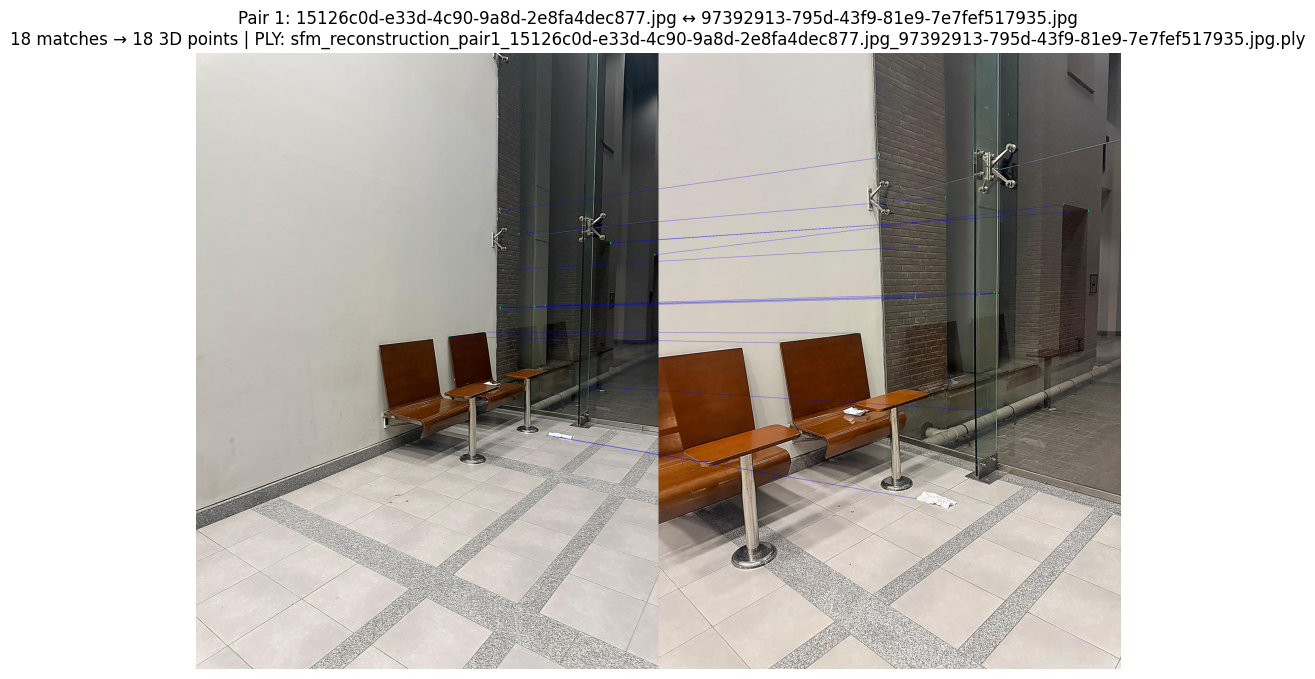

3D Point Cloud Visualization for Pair 1:


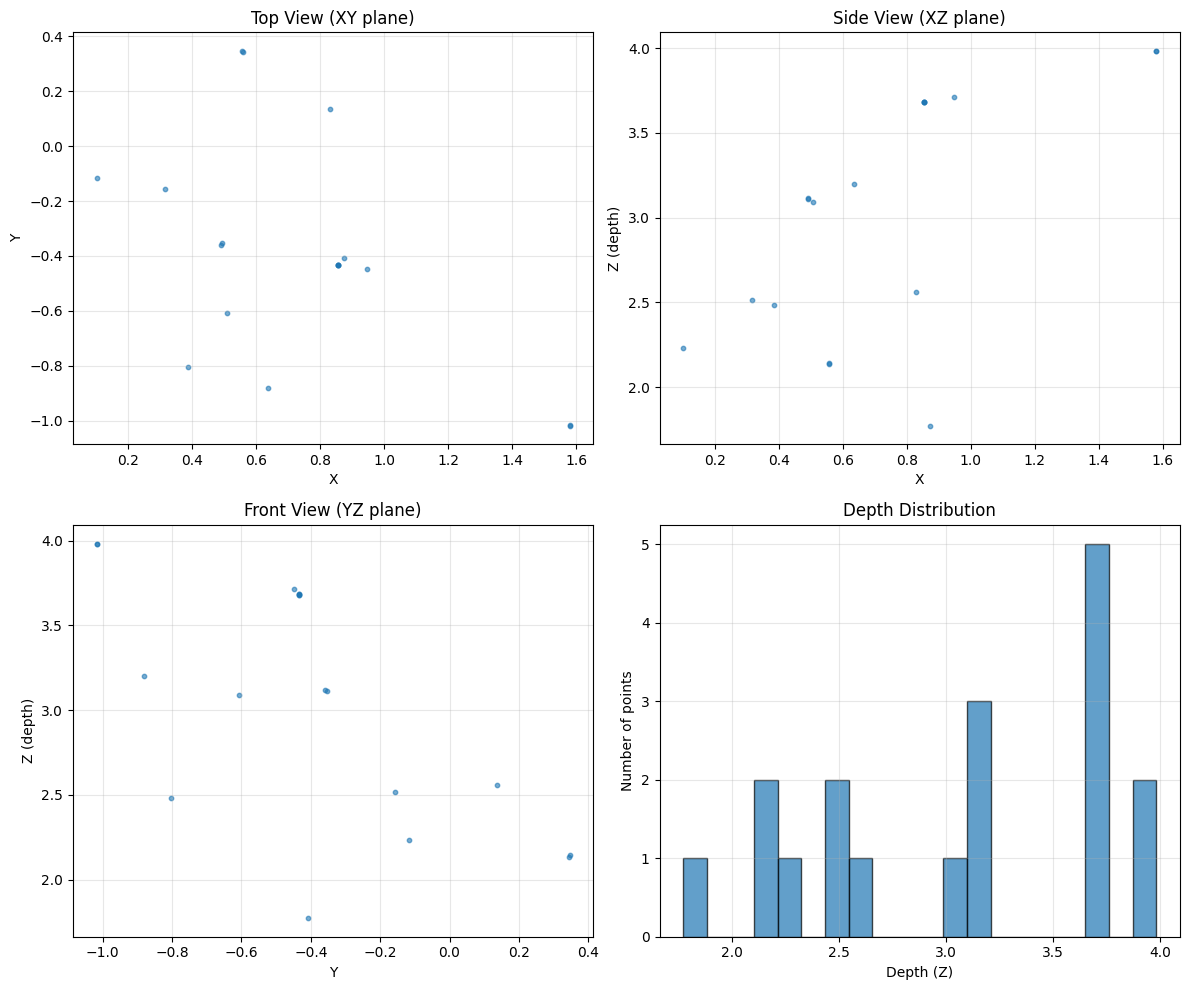


--- Pair 2: caeb20a0-f240-45a6-b511-371f5afce496.jpg ↔ d1c7f2f7-f2bc-467a-936f-900b2ebcda84.jpg ---


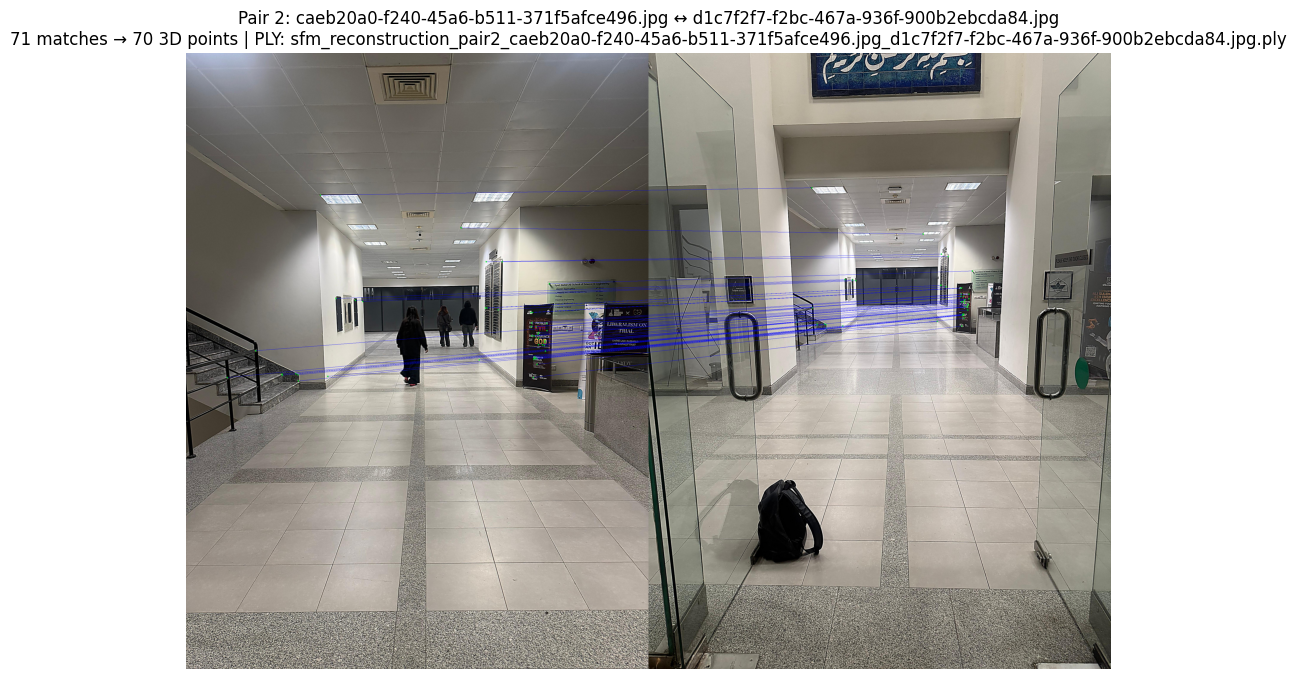

3D Point Cloud Visualization for Pair 2:


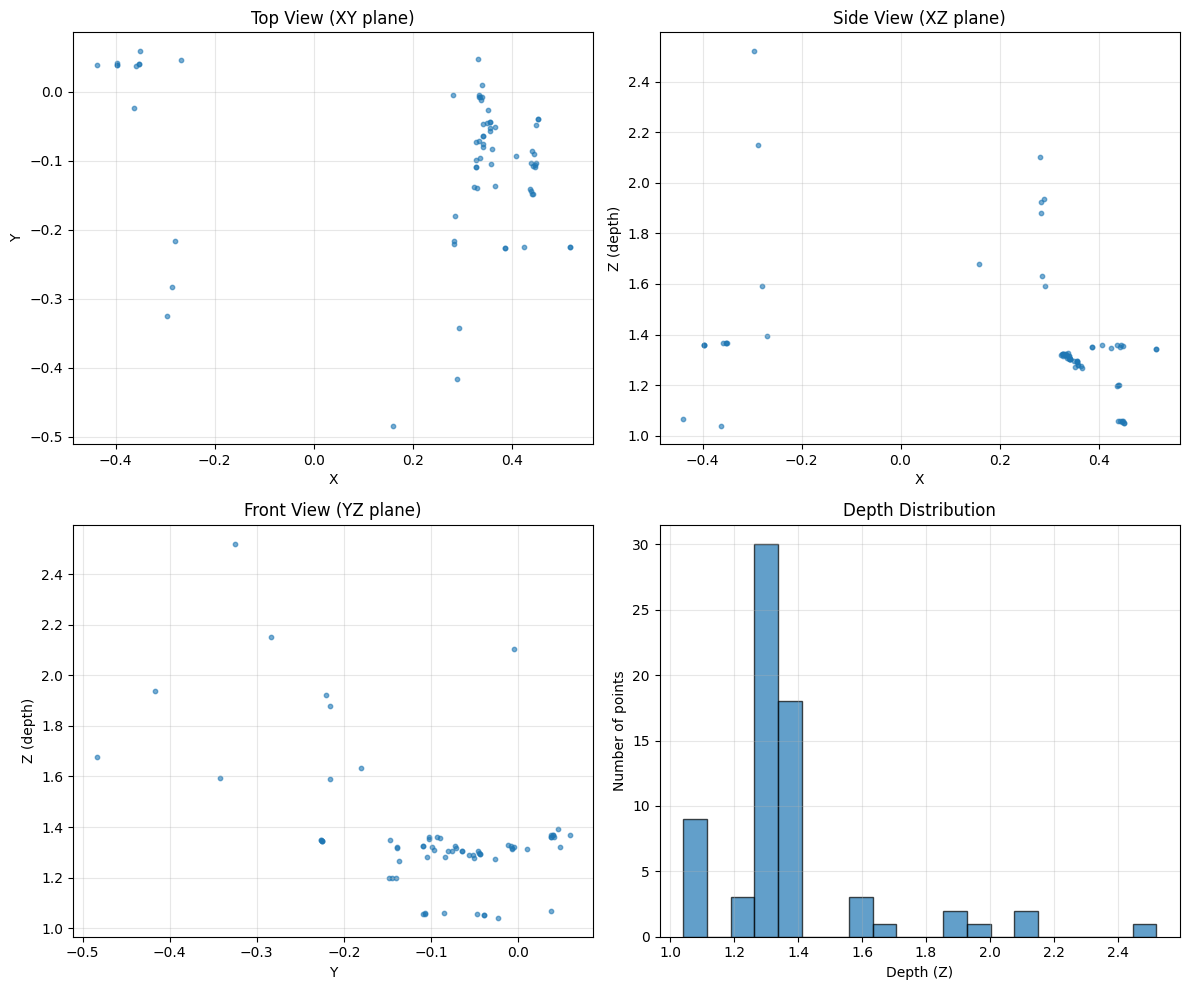


RECONSTRUCTION COMPLETE!
Summary:
Successful pairs: 2/2
Total 3D points: 88
PLY files created: 2


In [118]:
image_pairs = [
    ("processed_images/15126c0d-e33d-4c90-9a8d-2e8fa4dec877.jpg", 
     "processed_images/97392913-795d-43f9-81e9-7e7fef517935.jpg"),
     ("processed_images/caeb20a0-f240-45a6-b511-371f5afce496.jpg",
      "processed_images/d1c7f2f7-f2bc-467a-936f-900b2ebcda84.jpg")
]

print("=== STRUCTURE FROM MOTION - MULTIPLE PAIRS ===")
print(f"Processing {len(image_pairs)} image pairs\n")

if len(processed_images) >= 2:
    all_results = []
    
    for pair_idx, (img1_path, img2_path) in enumerate(image_pairs):
        print(f"\n{'='*60}")
        print(f"PROCESSING PAIR {pair_idx + 1}/{len(image_pairs)}")
        print(f"{'='*60}")
        
        img1_name = os.path.basename(img1_path)
        img2_name = os.path.basename(img2_path)
        
        print(f"Image Pair {pair_idx + 1}:")
        print(f"Image 1: {img1_name}")
        print(f"Image 2: {img2_name}")
        
        # Check if files exist
        if not os.path.exists(img1_path) or not os.path.exists(img2_path):
            print(f"One or both images not found, skipping pair {pair_idx + 1}")
            continue
        
        img1 = cv2.imread(img1_path)
        img2 = cv2.imread(img2_path)
        
        height1, width1 = img1.shape[:2]
        height2, width2 = img2.shape[:2]
        
        print(f"Image 1 size: {width1}x{height1}")
        print(f"Image 2 size: {width2}x{height2}")
        
        K = construct_intrinsic_matrix(width1, height1)
        
        print("\nFeature Detection and Matching")
        pts1, pts2, kp1, kp2 = detect_and_match_sift_features(img1_path, img2_path)
        
        if pts1 is not None and len(pts1) >= 8:
            print("\nEssential Matrix Estimation")
            R, t, final_pts1, final_pts2 = estimate_essential_matrix_and_pose(pts1, pts2, K)
            
            if R is not None:
                print("\n3D Point Triangulation")
                points_3d = triangulate_points(final_pts1, final_pts2, K, R, t)
                
                if len(points_3d) > 0:
                    print("\nSave Point Cloud")
                    ply_filename = f"sfm_reconstruction_pair{pair_idx + 1}_{img1_name}_{img2_name}.ply"
                    save_point_cloud_ply(points_3d, ply_filename)
                    
                    print(f"Generated {len(points_3d)} 3D points for pair {pair_idx + 1}")
                    print(f"Point cloud saved as: {ply_filename}")
                    
                    all_results.append({
                        'pair_idx': pair_idx + 1,
                        'img1_name': img1_name,
                        'img2_name': img2_name,
                        'points_3d': points_3d,
                        'final_pts1': final_pts1,
                        'final_pts2': final_pts2,
                        'K': K, 'R': R, 't': t,
                        'ply_filename': ply_filename,
                        'img1_path': img1_path,
                        'img2_path': img2_path,
                        'width1': width1
                    })
                    
                    print(f"\nQuality Assessment for Pair {pair_idx + 1}")
                    
                else:
                    print(f"No valid 3D points generated for pair {pair_idx + 1}")
            else:
                print(f"Failed to estimate camera pose for pair {pair_idx + 1}")
        else:
            print(f"Not enough feature matches for reconstruction of pair {pair_idx + 1}")
    
    # Display results for all pairs
    if all_results:
        print(f"\n\n{'='*60}")
        print("VISUALIZATION OF ALL PAIRS")
        print(f"{'='*60}")
        
        for result in all_results:
            print(f"\n--- Pair {result['pair_idx']}: {result['img1_name']} ↔ {result['img2_name']} ---")
            
            # Create feature matches visualization
            img1_display = cv2.imread(result['img1_path'])
            img2_display = cv2.imread(result['img2_path'])
            
            matches_img = np.hstack([img1_display, img2_display])
            
            # Draw matches (show first 50 for clarity)
            for i in range(min(len(result['final_pts1']), 50)):
                pt1 = tuple(map(int, result['final_pts1'][i]))
                pt2 = tuple(map(int, result['final_pts2'][i] + [result['width1'], 0]))
                
                cv2.circle(matches_img, pt1, 3, (0, 255, 0), -1)
                cv2.circle(matches_img, pt2, 3, (0, 255, 0), -1)
                cv2.line(matches_img, pt1, pt2, (255, 0, 0), 1)
            
            plt.figure(figsize=(16, 8))
            plt.imshow(cv2.cvtColor(matches_img, cv2.COLOR_BGR2RGB))
            plt.title(f'Pair {result["pair_idx"]}: {result["img1_name"]} ↔ {result["img2_name"]}\n'
                     f'{len(result["final_pts1"])} matches → {len(result["points_3d"])} 3D points | '
                     f'PLY: {result["ply_filename"]}')
            plt.axis('off')
            plt.show()
            
            # Visualize 3D point cloud
            print(f"3D Point Cloud Visualization for Pair {result['pair_idx']}:")
            visualize_point_cloud_2d(result['points_3d'])
        
        # Summary
        total_points = sum(len(result['points_3d']) for result in all_results)
        print(f"\nRECONSTRUCTION COMPLETE!")
        print(f"Summary:")
        print(f"Successful pairs: {len(all_results)}/{len(image_pairs)}")
        print(f"Total 3D points: {total_points}")
        print(f"PLY files created: {len(all_results)}")
        
    else:
        print(f"\nNo successful reconstructions from {len(image_pairs)} pairs")
        
else:
    print("Need at least 2 processed images for SfM reconstruction")

In [14]:
from scipy.optimize import least_squares
from scipy.spatial.transform import Rotation as Rot

class MapPoint:
    def __init__(self, point_id, position_3d, descriptor, color=None):
        self.id = point_id
        self.position = np.array(position_3d, dtype=np.float64)
        self.descriptor = descriptor
        self.observations = []
        self.color = color if color is not None else np.random.randint(0, 255, 3)
    
    def add_observation(self, camera_idx, keypoint_idx, point_2d):
        self.observations.append((camera_idx, keypoint_idx, point_2d))

class Camera:
    def __init__(self, camera_id, K, R=None, t=None, image_path=None):
        self.id = camera_id
        self.K = K
        self.R = R if R is not None else np.eye(3)
        self.t = t if t is not None else np.zeros((3, 1))
        self.image_path = image_path
        self.keypoints = None
        self.descriptors = None
    
    def get_projection_matrix(self):
        return self.K @ np.hstack([self.R, self.t])
    
    def get_camera_center(self):
        return -self.R.T @ self.t

class SfMMap:
    def __init__(self):
        self.cameras = []
        self.map_points = []
        self.next_point_id = 0
        self.next_camera_id = 0
    
    def add_camera(self, K, R=None, t=None, image_path=None):
        camera = Camera(self.next_camera_id, K, R, t, image_path)
        self.cameras.append(camera)
        self.next_camera_id += 1
        return camera
    
    def add_map_point(self, position_3d, descriptor, color=None):
        point = MapPoint(self.next_point_id, position_3d, descriptor, color)
        self.map_points.append(point)
        self.next_point_id += 1
        return point
    
    def get_all_3d_points(self):
        if len(self.map_points) == 0:
            return np.array([])
        return np.array([p.position for p in self.map_points])
    
    def get_all_descriptors(self):
        if len(self.map_points) == 0:
            return np.array([])
        return np.array([p.descriptor for p in self.map_points])


In [15]:
def match_2d_to_3d(new_descriptors, map_descriptors, ratio_thresh=0.7):
    if len(map_descriptors) == 0 or new_descriptors is None:
        return []
    
    if new_descriptors.dtype == np.float32 or new_descriptors.dtype == np.float64:
        FLANN_INDEX_KDTREE = 1
        index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
        search_params = dict(checks=50)
        matcher = cv2.FlannBasedMatcher(index_params, search_params)
    else:
        matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
    
    try:
        knn_matches = matcher.knnMatch(new_descriptors, map_descriptors, k=2)
    except:
        return []
    
    good_matches = []
    for match_pair in knn_matches:
        if len(match_pair) == 2:
            m, n = match_pair
            if m.distance < ratio_thresh * n.distance:
                good_matches.append((m.queryIdx, m.trainIdx))
    
    return good_matches

def find_2d_3d_correspondences(camera, sfm_map, ratio_thresh=0.7):
    if camera.descriptors is None or len(sfm_map.map_points) == 0:
        return np.array([]), np.array([]), []
    
    map_descriptors = sfm_map.get_all_descriptors()
    
    matches = match_2d_to_3d(camera.descriptors, map_descriptors, ratio_thresh)
    
    if len(matches) == 0:
        return np.array([]), np.array([]), []
    
    points_2d = []
    points_3d = []
    point_indices = []
    
    for query_idx, map_idx in matches:
        kp_2d = camera.keypoints[query_idx].pt
        pt_3d = sfm_map.map_points[map_idx].position
        
        points_2d.append(kp_2d)
        points_3d.append(pt_3d)
        point_indices.append(map_idx)
    
    return np.array(points_2d, dtype=np.float32), np.array(points_3d, dtype=np.float64), point_indices


In [16]:
def localize_camera_pnp(camera, points_2d, points_3d, K, 
                        reproj_error_thresh=8.0, confidence=0.99):

    if len(points_2d) < 6: 
        print(f"Not enough points for PnP: {len(points_2d)} < 6")
        return False, None
    
    success, rvec, tvec, inliers = cv2.solvePnPRansac(
        points_3d,        
        points_2d,       
        K,             
        None,      
        reprojectionError=reproj_error_thresh,
        confidence=confidence,
        flags=cv2.SOLVEPNP_ITERATIVE
    )
    
    if not success or inliers is None:
        return False, None
    
    R, _ = cv2.Rodrigues(rvec)
    t = tvec
    
    camera.R = R
    camera.t = t
    
    num_inliers = len(inliers)
    inlier_ratio = num_inliers / len(points_2d)
    
    print(f"PnP localization successful:")
    print(f"  Inliers: {num_inliers}/{len(points_2d)} ({inlier_ratio*100:.1f}%)")
    print(f"  Camera position: {camera.get_camera_center().flatten()}")
    
    inlier_mask = np.zeros(len(points_2d), dtype=bool)
    inlier_mask[inliers.flatten()] = True
    
    return True, inlier_mask

def add_new_camera_to_map(sfm_map, image_path, K):

    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    try:
        detector = cv2.SIFT_create()
    except:
        detector = cv2.ORB_create(nfeatures=3000)
    
    keypoints, descriptors = detector.detectAndCompute(gray, None)
    print(f"Detected {len(keypoints)} features")
    
    if descriptors is None or len(keypoints) < 6:
        print("Not enough features detected")
        return None
    
    camera = sfm_map.add_camera(K, image_path=image_path)
    camera.keypoints = keypoints
    camera.descriptors = descriptors
    
    points_2d, points_3d, point_indices = find_2d_3d_correspondences(camera, sfm_map)
    
    if len(points_2d) < 6:
        sfm_map.cameras.pop()
        return None
    
    print(f"Found {len(points_2d)} 2D-3D correspondences")
    
    success, inlier_mask = localize_camera_pnp(camera, points_2d, points_3d, K)
    
    if not success:
        sfm_map.cameras.pop()
        return None
    
    for i, is_inlier in enumerate(inlier_mask):
        if is_inlier:
            map_point_idx = point_indices[i]
            kp_idx = None
            for j, kp in enumerate(keypoints):
                if np.allclose(kp.pt, points_2d[i], atol=0.1):
                    kp_idx = j
                    break
            if kp_idx is not None:
                sfm_map.map_points[map_point_idx].add_observation(
                    camera.id, kp_idx, points_2d[i]
                )
    
    return camera



In [17]:
def triangulate_new_points(sfm_map, new_camera, reference_cameras=None, max_reproj_error=4.0):
    if reference_cameras is None:
        reference_cameras = [cam for cam in sfm_map.cameras if cam.id != new_camera.id]
    
    if len(reference_cameras) == 0:
        print("No reference cameras for triangulation")
        return 0
    
    
    num_new_points = 0
    
    for ref_cam in reference_cameras:
        matches = match_2d_to_3d(
            new_camera.descriptors, 
            ref_cam.descriptors, 
            ratio_thresh=0.7
        )
        
        if len(matches) < 10:
            continue
        
        print(f"  Camera {ref_cam.id} - Camera {new_camera.id}: {len(matches)} matches")
        
        pts_new = []
        pts_ref = []
        new_kp_indices = []
        ref_kp_indices = []
        new_descriptors = []
        
        for new_idx, ref_idx in matches:
            already_exists = False
            for map_point in sfm_map.map_points:
                for obs_cam_id, obs_kp_idx, _ in map_point.observations:
                    if obs_cam_id == new_camera.id and obs_kp_idx == new_idx:
                        already_exists = True
                        break
                    if obs_cam_id == ref_cam.id and obs_kp_idx == ref_idx:
                        already_exists = True
                        break
                if already_exists:
                    break
            
            if not already_exists:
                pts_new.append(new_camera.keypoints[new_idx].pt)
                pts_ref.append(ref_cam.keypoints[ref_idx].pt)
                new_kp_indices.append(new_idx)
                ref_kp_indices.append(ref_idx)
                new_descriptors.append(new_camera.descriptors[new_idx])
        
        if len(pts_new) < 5:
            continue
        
        pts_new = np.array(pts_new, dtype=np.float32)
        pts_ref = np.array(pts_ref, dtype=np.float32)
        
        P_ref = ref_cam.get_projection_matrix()
        P_new = new_camera.get_projection_matrix()
        
        points_4d = cv2.triangulatePoints(P_ref, P_new, pts_ref.T, pts_new.T)
        points_3d = (points_4d[:3] / points_4d[3]).T
        
        for i, pt_3d in enumerate(points_3d):
            pt_3d_hom = np.append(pt_3d, 1)
            depth_ref = (ref_cam.R @ pt_3d + ref_cam.t.flatten())[2]
            depth_new = (new_camera.R @ pt_3d + new_camera.t.flatten())[2]
            
            if depth_ref <= 0 or depth_new <= 0:
                continue
            
            pt_2d_ref_proj = P_ref @ pt_3d_hom
            pt_2d_ref_proj = pt_2d_ref_proj[:2] / pt_2d_ref_proj[2]
            error_ref = np.linalg.norm(pt_2d_ref_proj - pts_ref[i])
            
            pt_2d_new_proj = P_new @ pt_3d_hom
            pt_2d_new_proj = pt_2d_new_proj[:2] / pt_2d_new_proj[2]
            error_new = np.linalg.norm(pt_2d_new_proj - pts_new[i])
            
            if error_ref < max_reproj_error and error_new < max_reproj_error:
                map_point = sfm_map.add_map_point(pt_3d, new_descriptors[i])
                map_point.add_observation(ref_cam.id, ref_kp_indices[i], pts_ref[i])
                map_point.add_observation(new_camera.id, new_kp_indices[i], pts_new[i])
                num_new_points += 1
    
    print(f"Added {num_new_points} new 3D points to the map")
    print(f"Total map points: {len(sfm_map.map_points)}")
    
    return num_new_points


In [18]:
def bundle_adjustment(sfm_map, fix_first_camera=True, verbose=True):

    if len(sfm_map.cameras) < 2 or len(sfm_map.map_points) == 0:
        print("Not enough cameras or points for bundle adjustment")
        return None, None
    
    print(f"Cameras: {len(sfm_map.cameras)}")
    print(f"3D Points: {len(sfm_map.map_points)}")
    
    camera_params = []
    camera_start_idx = {}
    
    start_idx = 0
    for cam in sfm_map.cameras:
        rvec, _ = cv2.Rodrigues(cam.R)
        camera_params.extend(rvec.flatten())
        camera_params.extend(cam.t.flatten())
        camera_start_idx[cam.id] = start_idx
        start_idx += 6
    
    num_camera_params = len(camera_params)
    
    point_params = []
    point_start_idx = {}
    
    for i, point in enumerate(sfm_map.map_points):
        point_params.extend(point.position)
        point_start_idx[point.id] = num_camera_params + i * 3
    
    x0 = np.array(camera_params + point_params)
    
    print(f"Optimization variables: {len(x0)} ({num_camera_params} camera + {len(point_params)} point params)")
    
    observations = []
    for point in sfm_map.map_points:
        for cam_id, kp_idx, pt_2d in point.observations:
            observations.append((cam_id, point.id, pt_2d))
    
    def compute_residuals(params):
        residuals = []
        
        for cam_id, point_id, observed_2d in observations:
            cam_idx = camera_start_idx[cam_id]
            rvec = params[cam_idx:cam_idx+3]
            tvec = params[cam_idx+3:cam_idx+6]
            pt_idx = point_start_idx[point_id]
            pt_3d = params[pt_idx:pt_idx+3]
            R, _ = cv2.Rodrigues(rvec)
            camera = [c for c in sfm_map.cameras if c.id == cam_id][0]
            K = camera.K
            P = K @ np.hstack([R, tvec.reshape(3, 1)])
            pt_3d_hom = np.append(pt_3d, 1)
            projected_2d_hom = P @ pt_3d_hom
            projected_2d = projected_2d_hom[:2] / projected_2d_hom[2]
            residual = projected_2d - observed_2d
            residuals.extend(residual)
        
        return np.array(residuals)
    
    initial_residuals = compute_residuals(x0)
    initial_error = np.mean(np.abs(initial_residuals))
    initial_rmse = np.sqrt(np.mean(initial_residuals**2))
    
    print(f"  Mean: {initial_error:.4f} pixels")
    print(f"  RMSE: {initial_rmse:.4f} pixels")
    
    if fix_first_camera and len(sfm_map.cameras) > 0:
        epsilon = 1e-10
        lower_bounds = np.full(len(x0), -np.inf)
        upper_bounds = np.full(len(x0), np.inf)
        
        first_cam_idx = camera_start_idx[0]
        for i in range(6):
            lower_bounds[first_cam_idx + i] = x0[first_cam_idx + i] - epsilon
            upper_bounds[first_cam_idx + i] = x0[first_cam_idx + i] + epsilon
        
        bounds = (lower_bounds, upper_bounds)
    else:
        bounds = (-np.inf, np.inf)
    
    print("\nRunning optimization:")
    result = least_squares(
        compute_residuals,
        x0,
        bounds=bounds,
        method='trf',
        verbose=2 if verbose else 0,
        max_nfev=100,
        ftol=1e-6,
        xtol=1e-6
    )
    
    optimized_params = result.x
    
    for cam in sfm_map.cameras:
        cam_idx = camera_start_idx[cam.id]
        rvec = optimized_params[cam_idx:cam_idx+3]
        tvec = optimized_params[cam_idx+3:cam_idx+6]
        
        R, _ = cv2.Rodrigues(rvec)
        cam.R = R
        cam.t = tvec.reshape(3, 1)
    
    for point in sfm_map.map_points:
        pt_idx = point_start_idx[point.id]
        point.position = optimized_params[pt_idx:pt_idx+3]
    
    final_residuals = compute_residuals(optimized_params)
    final_error = np.mean(np.abs(final_residuals))
    final_rmse = np.sqrt(np.mean(final_residuals**2))
    
    print(f"\nFinal reprojection error:")
    print(f"  Mean: {final_error:.4f} pixels")
    print(f"  RMSE: {final_rmse:.4f} pixels")
    print(f"\nImprovement:")
    print(f"  Mean error reduced by: {((initial_error - final_error) / initial_error * 100):.2f}%")
    print(f"  RMSE reduced by: {((initial_rmse - final_rmse) / initial_rmse * 100):.2f}%")
    print("="*60)
    
    return initial_error, final_error


In [19]:
def initialize_map_from_two_views(sfm_map, img1_path, img2_path, K):
    print(f"Image 1: {os.path.basename(img1_path)}")
    print(f"Image 2: {os.path.basename(img2_path)}")
    
    pts1, pts2, kp1, kp2 = detect_and_match_sift_features(img1_path, img2_path)
    
    if pts1 is None or len(pts1) < 8:
        print("Failed: Not enough feature matches")
        return False
    
    R, t, final_pts1, final_pts2 = estimate_essential_matrix_and_pose(pts1, pts2, K)
    
    if R is None:
        print("Failed: Could not estimate camera pose")
        return False
    
    cam1 = sfm_map.add_camera(K, R=np.eye(3), t=np.zeros((3, 1)), image_path=img1_path)
    
    img1 = cv2.imread(img1_path)
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    try:
        detector = cv2.SIFT_create()
    except:
        detector = cv2.ORB_create(nfeatures=3000)
    cam1.keypoints, cam1.descriptors = detector.detectAndCompute(gray1, None)
    
    cam2 = sfm_map.add_camera(K, R=R, t=t, image_path=img2_path)
    img2 = cv2.imread(img2_path)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    cam2.keypoints, cam2.descriptors = detector.detectAndCompute(gray2, None)
    points_3d = triangulate_points(final_pts1, final_pts2, K, R, t)
    for i, pt_3d in enumerate(points_3d):
        desc1_idx = None
        desc2_idx = None
        
        for j, kp in enumerate(cam1.keypoints):
            if np.allclose(kp.pt, final_pts1[i], atol=0.5):
                desc1_idx = j
                break
        
        for j, kp in enumerate(cam2.keypoints):
            if np.allclose(kp.pt, final_pts2[i], atol=0.5):
                desc2_idx = j
                break
        
        if desc1_idx is not None and desc2_idx is not None:
            descriptor = cam1.descriptors[desc1_idx]
            map_point = sfm_map.add_map_point(pt_3d, descriptor)
            map_point.add_observation(cam1.id, desc1_idx, final_pts1[i])
            map_point.add_observation(cam2.id, desc2_idx, final_pts2[i])
    
    print(f"Initial cameras: {len(sfm_map.cameras)}")
    print(f"Initial 3D points: {len(sfm_map.map_points)}")
    
    return True

def incremental_sfm(image_paths, K, run_bundle_adjustment=True, ba_interval=3):

    if len(image_paths) < 2:
        print("Need at least 2 images for SfM")
        return None
    
    print("INCREMENTAL STRUCTURE FROM MOTION")
    print(f"Total images: {len(image_paths)}")
    print(f"Bundle Adjustment: {'Enabled' if run_bundle_adjustment else 'Disabled'}")
    if run_bundle_adjustment and ba_interval > 0:
        print(f"BA interval: Every {ba_interval} images")
    
    sfm_map = SfMMap()
    success = initialize_map_from_two_views(sfm_map, image_paths[0], image_paths[1], K)
    
    if not success:
        print("Failed to initialize map from first two images")
        return None
    for i in range(2, len(image_paths)):
        img_path = image_paths[i]
        print(f"\n{'='*60}")
        print(f"ADDING IMAGE {i+1}/{len(image_paths)}")
        print(f"{'='*60}")
        new_camera = add_new_camera_to_map(sfm_map, img_path, K)
        
        if new_camera is None:
            print(f"Failed to add camera {i+1}, skipping...")
            continue
        num_new_points = triangulate_new_points(sfm_map, new_camera)
        
        print(f"\nCurrent map state:")
        print(f"  Cameras: {len(sfm_map.cameras)}")
        print(f"  3D Points: {len(sfm_map.map_points)}")
        
        if run_bundle_adjustment and ba_interval > 0:
            if (i + 1) % ba_interval == 0:
                print(f"\n--- Running Bundle Adjustment (after {i+1} images) ---")
                bundle_adjustment(sfm_map, fix_first_camera=True, verbose=False)
    
    if run_bundle_adjustment:
        print(f"\n{'='*60}")
        print("FINAL BUNDLE ADJUSTMENT")
        print(f"{'='*60}")
        bundle_adjustment(sfm_map, fix_first_camera=True, verbose=True)
    
    print(f"Final reconstruction:")
    print(f"  Successfully registered cameras: {len(sfm_map.cameras)}/{len(image_paths)}")
    print(f"  Total 3D points: {len(sfm_map.map_points)}")
    
    return sfm_map


In [20]:
def visualize_camera_trajectory(sfm_map, title="Camera Trajectory"):
    if len(sfm_map.cameras) == 0:
        print("No cameras to visualize")
        return
    
    fig = plt.figure(figsize=(15, 5))
    
    camera_centers = []
    for cam in sfm_map.cameras:
        center = cam.get_camera_center().flatten()
        camera_centers.append(center)
    camera_centers = np.array(camera_centers)
    points_3d = sfm_map.get_all_3d_points()
    
    ax1 = fig.add_subplot(131)
    if len(points_3d) > 0:
        ax1.scatter(points_3d[:, 0], points_3d[:, 1], c='lightblue', 
                   alpha=0.3, s=1, label='3D Points')
    ax1.plot(camera_centers[:, 0], camera_centers[:, 1], 'r-o', 
            linewidth=2, markersize=8, label='Camera Trajectory')
    ax1.scatter(camera_centers[0, 0], camera_centers[0, 1], 
               c='green', s=200, marker='*', label='Start', zorder=5)
    ax1.scatter(camera_centers[-1, 0], camera_centers[-1, 1], 
               c='red', s=200, marker='*', label='End', zorder=5)
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_title('Top View (XY plane)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.axis('equal')
    
    ax2 = fig.add_subplot(132)
    if len(points_3d) > 0:
        ax2.scatter(points_3d[:, 0], points_3d[:, 2], c='lightblue', 
                   alpha=0.3, s=1, label='3D Points')
    ax2.plot(camera_centers[:, 0], camera_centers[:, 2], 'r-o', 
            linewidth=2, markersize=8, label='Camera Trajectory')
    ax2.scatter(camera_centers[0, 0], camera_centers[0, 2], 
               c='green', s=200, marker='*', label='Start', zorder=5)
    ax2.scatter(camera_centers[-1, 0], camera_centers[-1, 2], 
               c='red', s=200, marker='*', label='End', zorder=5)
    ax2.set_xlabel('X')
    ax2.set_ylabel('Z (depth)')
    ax2.set_title('Side View (XZ plane)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.axis('equal')
    
    ax3 = fig.add_subplot(133)
    if len(points_3d) > 0:
        ax3.scatter(points_3d[:, 1], points_3d[:, 2], c='lightblue', 
                   alpha=0.3, s=1, label='3D Points')
    ax3.plot(camera_centers[:, 1], camera_centers[:, 2], 'r-o', 
            linewidth=2, markersize=8, label='Camera Trajectory')
    ax3.scatter(camera_centers[0, 1], camera_centers[0, 2], 
               c='green', s=200, marker='*', label='Start', zorder=5)
    ax3.scatter(camera_centers[-1, 1], camera_centers[-1, 2], 
               c='red', s=200, marker='*', label='End', zorder=5)
    ax3.set_xlabel('Y')
    ax3.set_ylabel('Z (depth)')
    ax3.set_title('Front View (YZ plane)')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    ax3.axis('equal')
    
    plt.suptitle(title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print(f"\nCamera Trajectory Statistics:")
    print(f"Number of cameras: {len(sfm_map.cameras)}")
    if len(camera_centers) > 1:
        distances = np.linalg.norm(np.diff(camera_centers, axis=0), axis=1)
        print(f"Total path length: {np.sum(distances):.2f} units")
        print(f"Average step size: {np.mean(distances):.2f} units")
        print(f"Min step size: {np.min(distances):.2f} units")
        print(f"Max step size: {np.max(distances):.2f} units")

def save_incremental_reconstruction_ply(sfm_map, filename="incremental_reconstruction.ply"):
    if len(sfm_map.map_points) == 0:
        print("No points to save")
        return None
    
    points_3d = sfm_map.get_all_3d_points()
    colors = np.array([p.color for p in sfm_map.map_points])
    
    header = f"""ply
format ascii 1.0
element vertex {len(points_3d)}
property float x
property float y
property float z
property uchar red
property uchar green
property uchar blue
end_header
"""
    
    with open(filename, 'w') as f:
        f.write(header)
        for i, point in enumerate(points_3d):
            f.write(f"{point[0]:.6f} {point[1]:.6f} {point[2]:.6f} ")
            f.write(f"{colors[i, 0]} {colors[i, 1]} {colors[i, 2]}\n")
    
    print(f"\nPoint cloud saved to: {filename}")
    print(f"Total points: {len(points_3d)}")
    
    return filename

def visualize_reconstruction_quality(sfm_map):
    if len(sfm_map.map_points) == 0:
        print("No points to analyze")
        return
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    num_observations = [len(p.observations) for p in sfm_map.map_points]
    axes[0, 0].hist(num_observations, bins=range(2, max(num_observations)+2), 
                    edgecolor='black', alpha=0.7)
    axes[0, 0].set_xlabel('Number of Observations per Point')
    axes[0, 0].set_ylabel('Number of Points')
    axes[0, 0].set_title('Point Observation Distribution')
    axes[0, 0].grid(True, alpha=0.3)
    
    points_3d = sfm_map.get_all_3d_points()
    depths = points_3d[:, 2]
    axes[0, 1].hist(depths, bins=50, edgecolor='black', alpha=0.7)
    axes[0, 1].set_xlabel('Depth (Z coordinate)')
    axes[0, 1].set_ylabel('Number of Points')
    axes[0, 1].set_title('Depth Distribution')
    axes[0, 1].grid(True, alpha=0.3)
    
    axes[1, 0].hexbin(points_3d[:, 0], points_3d[:, 1], gridsize=30, cmap='YlOrRd')
    axes[1, 0].set_xlabel('X')
    axes[1, 0].set_ylabel('Y')
    axes[1, 0].set_title('Point Density (Top View)')
    axes[1, 0].set_aspect('equal')
    
    camera_centers = np.array([cam.get_camera_center().flatten() for cam in sfm_map.cameras])
    axes[1, 1].scatter(points_3d[:, 0], points_3d[:, 1], c='lightblue', 
                      alpha=0.3, s=5, label='3D Points')
    axes[1, 1].plot(camera_centers[:, 0], camera_centers[:, 1], 'r-o', 
                   linewidth=2, markersize=6, label='Cameras')
    axes[1, 1].set_xlabel('X')
    axes[1, 1].set_ylabel('Y')
    axes[1, 1].set_title('Camera Coverage')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].set_aspect('equal')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Total 3D points: {len(sfm_map.map_points)}")
    print(f"Total cameras: {len(sfm_map.cameras)}")
    print(f"Average observations per point: {np.mean(num_observations):.2f}")
    print(f"Points with 2+ views: {sum(1 for n in num_observations if n >= 2)}")
    print(f"Points with 3+ views: {sum(1 for n in num_observations if n >= 3)}")
    print(f"\nDepth statistics:")
    print(f"  Min: {np.min(depths):.2f}")
    print(f"  Max: {np.max(depths):.2f}")
    print(f"  Mean: {np.mean(depths):.2f}")
    print(f"  Median: {np.median(depths):.2f}")
    print(f"  Std: {np.std(depths):.2f}")


Found 51 processed images

Images in sequence:
  1. 060a9d02-f5e7-4f14-bb33-3775a71fa2ca.JPG
  2. 0ac40f4c-2b4d-4f92-947c-4e293de0e65a.JPG
  3. 0d2dbf8d-3470-4555-9f79-b0a4bbcceafa.JPG
  4. 0e047bb8-a536-4dd8-9272-ac6df733e666.JPG
  5. 11cd22e4-85a0-40d9-87df-ef17bf2fd6e0.JPG
  6. 11d2b5c4-0d67-4d03-88d1-4f4f1078fef1.JPG
  7. 122edcad-a87e-4347-aaed-708b0844a1c1.JPG
  8. 15126c0d-e33d-4c90-9a8d-2e8fa4dec877.JPG
  9. 16ccc8bf-d213-491e-9265-b78c422b0ffe.JPG
  10. 1bea58de-6df3-4346-b62e-ff21a577f487.JPG
  11. 1d4b1f28-6267-469a-8ddc-c28b5c5b485a.JPG
  12. 2bde335a-434b-427a-aa11-8fa120341959.JPG
  13. 3169f266-7dab-4f01-92d5-f41a6f12d937.JPG
  14. 3222c1e5-55e4-49bd-9ab0-ee262e9bf626.JPG
  15. 33cf601e-36f9-42f3-8424-f9469cbbdf09.JPG
  16. 3c3afd66-6a06-42cd-a660-c3b4d89a730f.JPG
  17. 42167b3b-8eee-4c2d-8e4d-ae2e2409b856.JPG
  18. 4d335d10-61c4-4ff2-bfa4-075f58dfd07c.JPG
  19. 4da92469-2ad6-4e3e-8cad-4ddbe80ab1e3.JPG
  20. 50eb38d0-40d6-4736-b710-5a794c8ac73d.JPG
  21. 65c1ea32-e53f-46

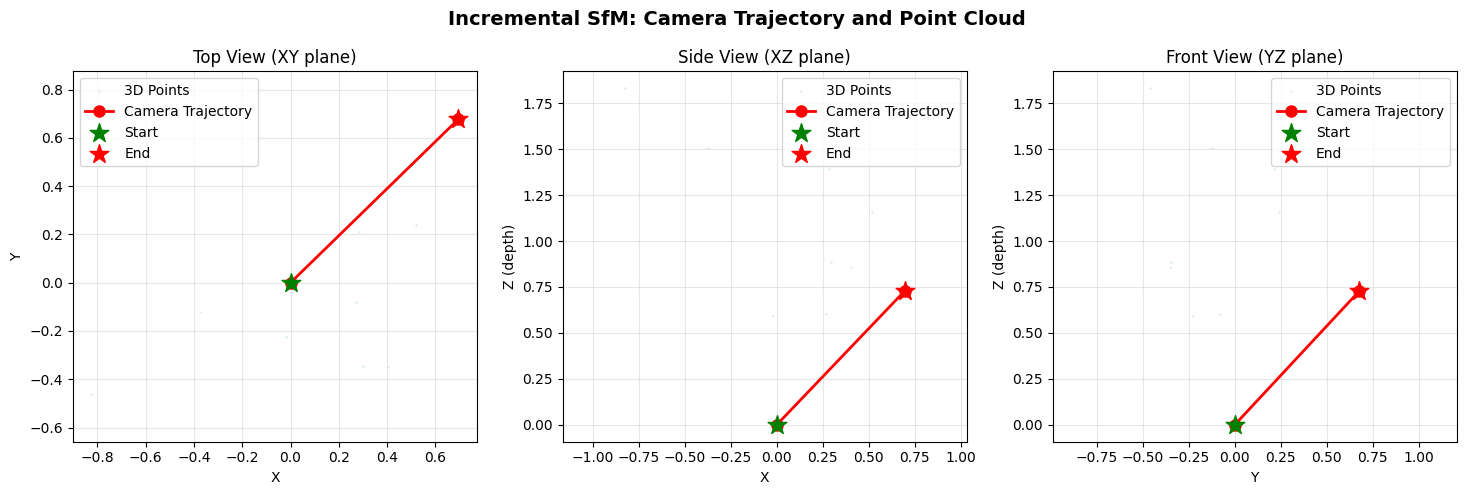


Camera Trajectory Statistics:
Number of cameras: 2
Total path length: 1.21 units
Average step size: 1.21 units
Min step size: 1.21 units
Max step size: 1.21 units

Reconstruction Quality Analysis


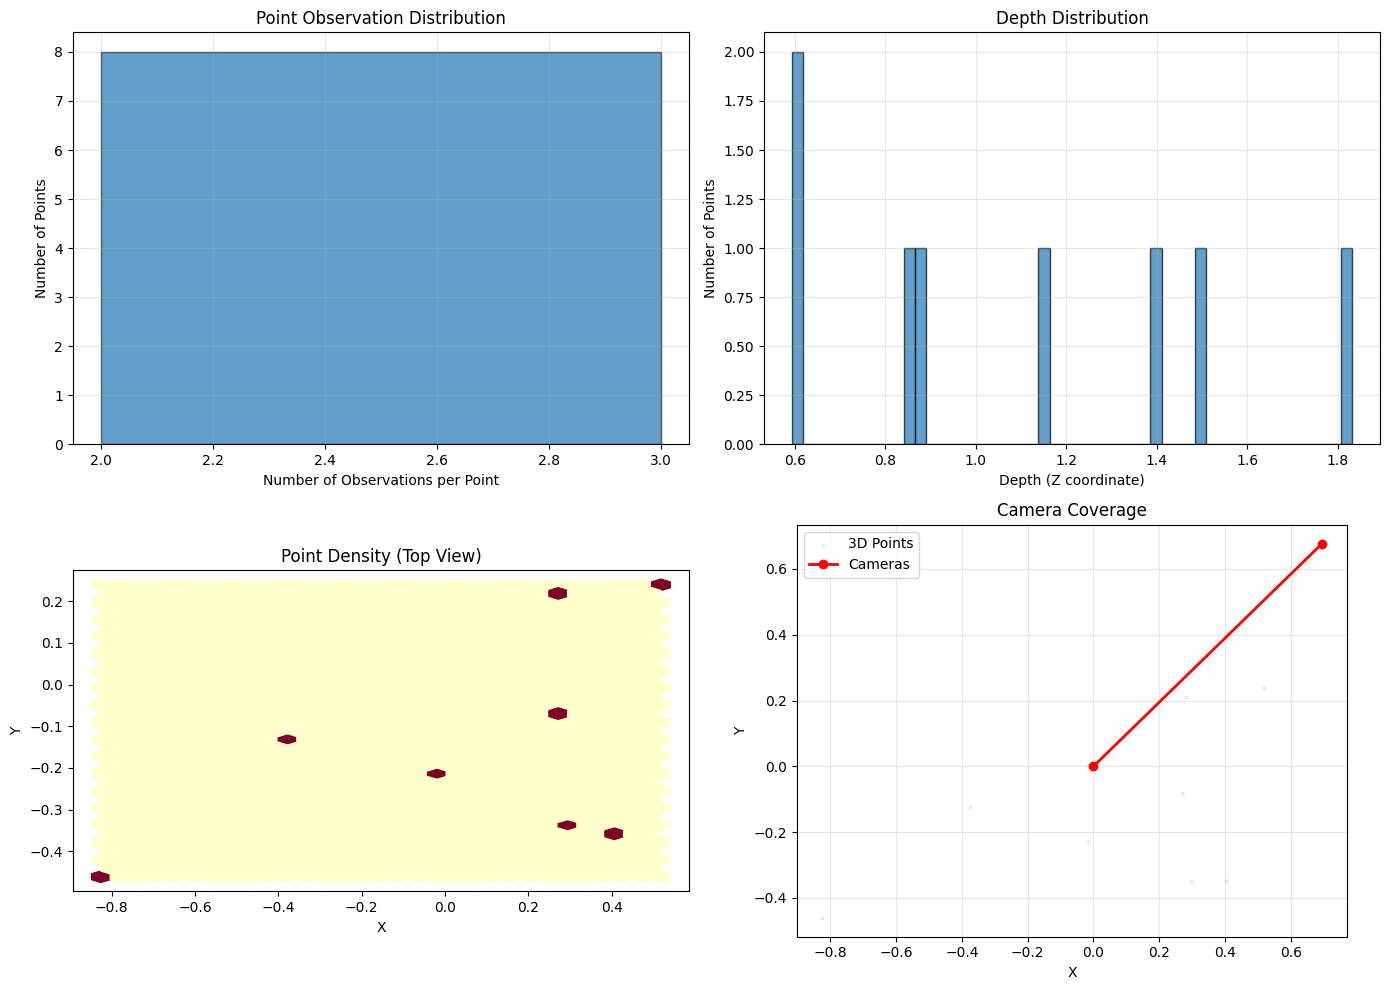

Total 3D points: 8
Total cameras: 2
Average observations per point: 2.00
Points with 2+ views: 8
Points with 3+ views: 0

Depth statistics:
  Min: 0.59
  Max: 1.83
  Mean: 1.10
  Median: 1.02
  Std: 0.42

3D Point Cloud Projections (2D views)


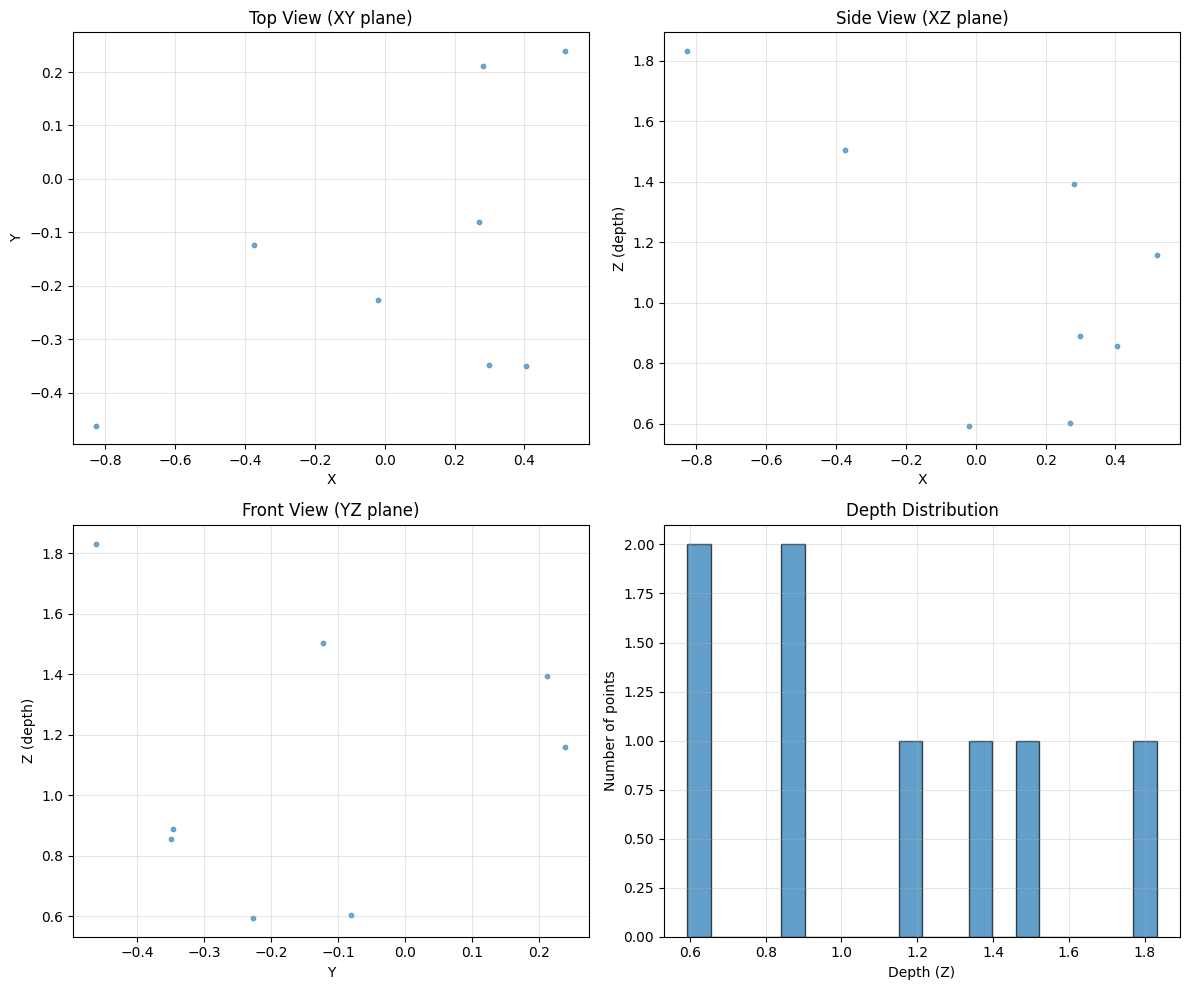

Input images: 5
Registered cameras: 2
Success rate: 40.0%
Total 3D points: 8
Average points per camera: 4.0
Output file: incremental_sfm_reconstruction.ply


In [21]:
processed_image_paths = sorted([
    os.path.join(output_folder, f) 
    for f in os.listdir(output_folder) 
    if f.lower().endswith(('.jpg', '.jpeg', '.png'))
])

print(f"Found {len(processed_image_paths)} processed images")
print("\nImages in sequence:")
for i, path in enumerate(processed_image_paths):
    print(f"  {i+1}. {os.path.basename(path)}")

num_images_to_use = min(5, len(processed_image_paths))
image_sequence = processed_image_paths[:num_images_to_use]

print(f"\nUsing {len(image_sequence)} images for reconstruction")

if len(image_sequence) >= 2:
    first_img = cv2.imread(image_sequence[0])
    height, width = first_img.shape[:2]
    
    K = construct_intrinsic_matrix(width, height)
    
    sfm_map = incremental_sfm(
        image_sequence, 
        K, 
        run_bundle_adjustment=True,
        ba_interval=2
    )
    
    if sfm_map is not None and len(sfm_map.cameras) >= 2:
        ply_file = save_incremental_reconstruction_ply(sfm_map, "incremental_sfm_reconstruction.ply")
        print("\nCamera Trajectory Visualization")
        visualize_camera_trajectory(sfm_map, "Incremental SfM: Camera Trajectory and Point Cloud")
        
        print("\nReconstruction Quality Analysis")
        visualize_reconstruction_quality(sfm_map)
        
        print("\n3D Point Cloud Projections (2D views)")
        points_3d = sfm_map.get_all_3d_points()
        if len(points_3d) > 0:
            visualize_point_cloud_2d(points_3d)
        
        print(f"Input images: {len(image_sequence)}")
        print(f"Registered cameras: {len(sfm_map.cameras)}")
        print(f"Success rate: {len(sfm_map.cameras)/len(image_sequence)*100:.1f}%")
        print(f"Total 3D points: {len(sfm_map.map_points)}")
        print(f"Average points per camera: {len(sfm_map.map_points)/len(sfm_map.cameras):.1f}")
        print(f"Output file: {ply_file}")
    else:
        print("\nReconstruction failed or insufficient cameras registered")
        
else:
    print("\nNeed at least 2 images to run incremental SfM")